In [1]:
import tensorflow as tf
import tenfem
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from tenfem.layers import AssembleStiffnessMatrix

## The `TriangleMesh` object

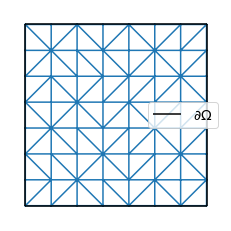

In [2]:
mesh = tenfem.mesh.examples.square(8, 8)

fig, ax = plt.subplots()
ax.triplot(mesh._triang)

ax.add_collection(
    LineCollection(tf.gather(mesh.nodes, mesh.boundary_elements), colors='k', label='$\partial \Omega$'))
ax.legend(fontsize=14)
ax.set_aspect('equal'); ax.axis('off')
for method in [ax.set_xlim, ax.set_ylim]:
    method((-0.1, 1.1))

plt.show()

## The `reference_element` 

The mesh above is a `tenfem.mesh.TriangleMesh` object, one of the most beautiful
aspects of the Finite Element Method is that the problem over the domain $\Omega$
is divided first into "physical elements" -- our triangles in the mesh above, and
then in terms of each of these physical elements to a single canonical 
`reference_element`, and also specify a bijection between the physical elements
and the canonical element.

One of the most important ways this manifests is that whenever we are doing integration
over a physical element, we parameterise in terms of coordinates of the reference element,
and in practice specify integrations by quadratures over the reference element. Once
we have specified a quadrature order, all of the callable components of our model will be
queried for values at these quadrature nodes, so lets inspect them.

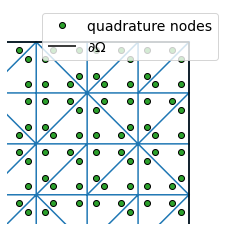

In [3]:
lin_tri_element = tenfem.reference_elements.TriangleElement(degree=1)
quadrature_nodes = lin_tri_element.get_quadrature_nodes(mesh)

fig, ax = plt.subplots()
ax.triplot(mesh._triang)
ax.set_aspect('equal'); ax.axis('off')

ax.plot(*tf.reshape(quadrature_nodes, [-1, 2]).numpy().T, 
        'o', markeredgecolor='k', label='quadrature nodes')
ax.add_collection(
    LineCollection(tf.gather(mesh.nodes, mesh.boundary_elements), colors='k', label='$\partial \Omega$'))
ax.legend(fontsize=14)

for method in [ax.set_xlim, ax.set_ylim]:
    method((0.49, 1.1))
plt.show()

## `AssembleStiffnessMatrix`

In [4]:
diffusion_coefficient = lambda x: tf.ones_like(x)[..., 0]
mesh_tensor_repr = mesh.get_tensor_repr()

stiffness_matrix = AssembleStiffnessMatrix(diffusion_coefficient,
                                           reference_element=lin_tri_element)(mesh_tensor_repr)

In [5]:
stiffness_matrix.reference_element

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'reference_element'